In [22]:
from sklearn.model_selection import train_test_split
import pandas
import numpy as np
from sklearn.neighbors import KDTree,BallTree,NearestNeighbors
from scipy import spatial

Load business data

In [23]:
restaurant_categories = pandas.Series(["Restaurants","Afghan", "African", "Senegalese", "South African", "American", "American", "Arabian", "Argentine", "Armenian", "Asian Fusion", "Australian", "Austrian", "Bangladeshi", "Barbeque", "Basque", "Belgian", "Brasseries", "Brazilian", "Breakfast & Brunch", "British", "Buffets", "Bulgarian", "Burgers", "Burmese", "Cafes", "Themed Cafes", "Cafeteria", "Cajun/Creole", "Cambodian", "Caribbean", "Dominican", "Haitian", "Puerto Rican", "Trinidadian", "Catalan", "Cheesesteaks", "Chicken Shop", "Chicken Wings", "Chinese", "Cantonese", "Dim Sum", "Hainan", "Shanghainese", "Szechuan", "Comfort Food", "Creperies", "Cuban", "Czech", "Delis", "Diners", "Dinner Theater", "Ethiopian", "Fast Food", "Filipino", "Fish & Chips", "Fondue", "Food Court", "Food Stands", "French", "Mauritius", "Reunion", "Game Meat", "Gastropubs", "Georgian", "German", "Gluten-Free", "Greek", "Guamanian", "Halal", "Hawaiian", "Himalayan/Nepalese", "Honduran", "Hong Kong Style Cafe", "Hot Dogs", "Hot Pot", "Hungarian", "Iberian", "Indian", "Indonesian", "Irish", "Italian", "Calabrian", "Sardinian", "Sicilian", "Tuscan", "Japanese", "Conveyor Belt Sushi", "Izakaya", "Japanese Curry", "Ramen", "Teppanyaki", "Kebab", "Korean", "Kosher", "Laotian", "Latin American", "Colombian", "Salvadoran", "Venezuelan", "Live/Raw Food", "Malaysian", "Mediterranean", "Falafel", "Mexican", "Tacos", "Middle Eastern", "Egyptian", "Lebanese", "Modern European", "Mongolian", "Moroccan", "New Mexican Cuisine", "Nicaraguan", "Noodles", "Pakistani", "Pan Asian", "Persian/Iranian", "Peruvian", "Pizza", "Polish", "Polynesian", "Pop-Up Restaurants", "Portuguese", "Poutineries", "Russian", "Salad", "Sandwiches", "Scandinavian", "Scottish", "Seafood", "Singaporean", "Slovakian", "Soul Food", "Soup", "Southern", "Spanish", "Sri Lankan", "Steakhouses", "Supper Clubs", "Sushi Bars", "Syrian", "Taiwanese", "Tapas Bars", "Tapas/Small Plates", "Tex-Mex", "Thai", "Turkish", "Ukrainian", "Uzbek", "Vegan", "Vegetarian", "Vietnamese", "Waffles", "Wraps"])
business_df = pandas.read_json("C:\\Users\\akshd\\Yelp Data\\yelp_dataset\\yelp_academic_dataset_business.json", lines=True)
business_df = business_df[["business_id", "categories", "city", "name", "stars"]]
business_df = business_df[business_df["categories"].apply(lambda x: x is not None)]
business_df = business_df[business_df["categories"].apply(lambda x: pandas.Series(x.split(", ")).isin(restaurant_categories).all())]

Consider restaurants in Charlotte

In [13]:
business_df = business_df[business_df['city'] == "Charlotte"]
business_df

,business_id,categories,city,name,stars
57,AYL_y8ahquUW0o-cvIyLbg,"Restaurants, Pizza",Charlotte,Junior's Pizzeria,3.5
107,zXRf_6Bs1yX9an_QKpzbHQ,"Fast Food, Restaurants",Charlotte,McDonalds,2.0
406,cabOEjEmUdFjDwe67HpXkA,"Restaurants, Pizza",Charlotte,Tony's Pizza,4.0
915,7os-CT7QI8P_sy1QKwhzjg,"Restaurants, Soup, Mexican, Salad",Charlotte,La Fiesta Grande,3.0
1294,1T0uhB3fMsmkfsECmbYkvA,"African, Restaurants",Charlotte,Motherland Cuisine & Market,4.0
1850,5UK1KtbB1dHTCo0LNDVslA,"Southern, Restaurants",Charlotte,Gus's SIR Beef Restaurant,3.5
2273,zd8dDaVh-BQHDieaIu-rVA,"Restaurants, Barbeque",Charlotte,Frankie Boys,3.5
2438,tNPWi75s0o20rNERLg6R_Q,"Pakistani, Restaurants, Indian, Buffets",Charlotte,Bombay Cuisine,4.0
2832,cZ86R4KIvSuTZiC5U4mhFg,"Restaurants, Food Stands",Charlotte,Goody Woody's,4.0
3210,dXI95VscrvdWu5qu6CjnWQ,"Mexican, Restaurants",Charlotte,Tacos El Nevado,4.5


Load Review Data

In [4]:
import ijson
import io
filename = "C:\\Users\\akshd\\Yelp Data\\yelp_dataset\\yelp_academic_dataset_review.json"
columns = ["user_id", "business_id", "stars"]
data = []
with open(filename, 'r', encoding="utf8") as f:
    i = 0
    for line_number, line in enumerate(f):
        if i == 6000000:
            break
        line_as_file = io.StringIO(line)
        objects = ijson.items(line_as_file, '')
        for row in objects:
            selected_row = []
            for item in columns:
                selected_row.append(row[item])
            data.append(selected_row)
        i+=1

Split data into train and test

In [14]:
#review_df = pandas.DataFrame(data, columns=columns)
review_df = review_df[review_df["business_id"].isin(business_df["business_id"])]
user_review_count = review_df.groupby("user_id").count().reset_index()
user_review_count = user_review_count[user_review_count["stars"] >= 10]["user_id"]
review_df = review_df[review_df["user_id"].isin(user_review_count)]
review_df_train, review_df_test = train_test_split(review_df, test_size=0.2, random_state=42)

Filter restaurants that do not have any reviews

In [21]:
business_df = business_df[business_df["business_id"].isin(review_df["business_id"])]
business_df

,business_id,categories,city,name,stars
57,AYL_y8ahquUW0o-cvIyLbg,"Restaurants, Pizza",Charlotte,Junior's Pizzeria,3.5
107,zXRf_6Bs1yX9an_QKpzbHQ,"Fast Food, Restaurants",Charlotte,McDonalds,2.0
406,cabOEjEmUdFjDwe67HpXkA,"Restaurants, Pizza",Charlotte,Tony's Pizza,4.0
915,7os-CT7QI8P_sy1QKwhzjg,"Restaurants, Soup, Mexican, Salad",Charlotte,La Fiesta Grande,3.0
1294,1T0uhB3fMsmkfsECmbYkvA,"African, Restaurants",Charlotte,Motherland Cuisine & Market,4.0
1850,5UK1KtbB1dHTCo0LNDVslA,"Southern, Restaurants",Charlotte,Gus's SIR Beef Restaurant,3.5
2273,zd8dDaVh-BQHDieaIu-rVA,"Restaurants, Barbeque",Charlotte,Frankie Boys,3.5
2438,tNPWi75s0o20rNERLg6R_Q,"Pakistani, Restaurants, Indian, Buffets",Charlotte,Bombay Cuisine,4.0
2832,cZ86R4KIvSuTZiC5U4mhFg,"Restaurants, Food Stands",Charlotte,Goody Woody's,4.0
3210,dXI95VscrvdWu5qu6CjnWQ,"Mexican, Restaurants",Charlotte,Tacos El Nevado,4.5


Save data to Pickle files

In [ ]:
business_df.to_pickle("./business.pkl")
review_df_train.to_pickle("./reviews_train.pkl")
review_df_test.to_pickle("./reviews_test.pkl")
review_df.to_pickle("./reviews_filtered.pkl")

Load data from pickle files

In [24]:
business_df = pandas.read_pickle('./business.pkl')
review_df = pandas.read_pickle('./reviews_filtered.pkl')
review_df_train = pandas.read_pickle('./reviews_train.pkl')
review_test_df = pandas.read_pickle('./reviews_test.pkl')

In [29]:
overall_avg_rating = review_train_df["stars"].mean() #average of all the ratings in the dataset
avg_user_rating_df = review_train_df.groupby(["user_id"]).mean() #average of all the ratings by a particular user
avg_business_rating_df = review_train_df.groupby(["business_id"]).mean() #average of all the ratings for a particular business

Funtion to calculate baseline rating

In [25]:
def calc_rating_baseline(user_id, business_id):
    user_bias = 0
    business_bias = 0
    user_rating = avg_user_rating_df[avg_user_rating_df.index == user_id]["stars"]
    if not user_rating.empty:
        user_bias = user_rating.item() - overall_avg_rating
    business_rating = avg_business_rating_df[avg_business_rating_df.index == business_id]["stars"]
    if not business_rating.empty:
        business_bias = business_rating.item() - overall_avg_rating
    return overall_avg_rating + user_bias + business_bias

Funtion to calculate user category similarity

In [26]:
def getUserCatSimilarityForCategory(category, reviews_df, user_id):
    visited_by_user = review_df_train[review_df_train["user_id"] == user_id]["business_id"]
    N_R = len(visited_by_user)
    if N_R == 0:
        return 0
    visited_by_user_cat = len(business_df[business_df["business_id"].isin(visited_by_user) & business_df["categories"].str.contains(category, na=False)])
    return visited_by_user_cat *1.0/ N_R

Create 4 folds for k-fold cross validation

In [27]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=4)
kf.get_n_splits(review_df)
review_test_folds = []
review_train_folds = []
print(kf)  
KFold(n_splits=4, random_state=None, shuffle=False)
for train_index, test_index in kf.split(review_df):
    review_train_df, review_test_df = review_df.iloc[train_index], review_df.iloc[test_index]
    review_test_folds.append(review_test_df)
    review_train_folds.append(review_train_df)

KFold(n_splits=4, random_state=None, shuffle=False)


In [28]:
review_df_train = review_train_folds[2]

Create user id hash

In [30]:
user_id_hash = {}
user_ids = review_df_train["user_id"].unique() 
for i,v in enumerate(user_ids):     
    user_id_hash[v] = i

Create business id hash

In [31]:
business_id_hash = {}
business_ids = review_df_train["business_id"].unique() 
for i,v in enumerate(business_ids):    
    business_id_hash[v] = i 

Create matrix for user business matrix

In [32]:
R = len(review_df_train["business_id"].unique()) 
C = len(review_df_train["user_id"].unique()) 
U = np.empty((R,C)) 
U[:] = np.nan

Populate the matrix with ratings

In [33]:
def populate_U(business_id,user_id,rating):  
    U[business_id_hash[business_id],user_id_hash[user_id]] = rating

In [34]:
review_df_train.apply(lambda x: populate_U(x.business_id,x.user_id,x.stars),axis = 1)

197        None
198        None
205        None
206        None
211        None
214        None
221        None
222        None
226        None
232        None
239        None
257        None
2376       None
2379       None
2382       None
2384       None
2387       None
2388       None
2390       None
2393       None
2395       None
2396       None
2397       None
8832       None
8836       None
8837       None
8838       None
8840       None
8847       None
8848       None
           ... 
5996070    None
5996087    None
5996092    None
5996093    None
5996094    None
5996095    None
5996097    None
5996099    None
5996105    None
5996112    None
5996121    None
5996123    None
5996128    None
5996139    None
5996143    None
5996149    None
5996151    None
5996153    None
5996652    None
5996659    None
5996663    None
5996668    None
5996669    None
5996670    None
5996672    None
5996676    None
5996683    None
5996689    None
5996695    None
5996699    None
Length: 13976, dtype: ob

Calculate row means

In [35]:
U = U.T
row_means = np.nanmean(U, axis=1)

Center the ratings

In [36]:
row_means_col_vec = row_means.reshape((len(U), 1)) 
centered_U = U - row_means_col_vec 
centered_U = np.nan_to_num(centered_U)

Create user user distance matrix

In [37]:
def cosine_dist(v1,v2): 
    return spatial.distance.correlation(v1,v2)

In [38]:
tree = NearestNeighbors(algorithm = 'ball_tree', metric = cosine_dist,n_neighbors=len(centered_U)).fit(centered_U)

C:\Users\akshd\Anaconda3\envs\Python3.6\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


In [39]:
dist,indices = tree.kneighbors(centered_U) 
dist,indices

C:\Users\akshd\Anaconda3\envs\Python3.6\lib\site-packages\scipy\spatial\distance.py:698: RuntimeWarning: invalid value encountered in double_scalars
  dist = 1.0 - uv / np.sqrt(uu * vv)


(array([[0.        , 0.63533184, 0.66364663, ..., 1.32289647,        inf,
                inf],
        [0.        , 0.73737374, 0.80356025, ..., 1.22003208,        inf,
                inf],
        [0.        , 0.64878032, 0.79373094, ..., 1.28097574,        inf,
                inf],
        ...,
        [0.        , 0.69639898, 0.74910818, ..., 1.2495208 ,        inf,
                inf],
        [0.        , 0.7454609 , 0.78089945, ..., 1.28995375,        inf,
                inf],
        [0.        , 0.67372869, 0.72487226, ..., 1.35909242,        inf,
                inf]]), array([[  0, 384, 104, ..., 377,   0,   0],
        [  1,  36, 240, ..., 204,   0,   0],
        [  2, 139, 644, ..., 595,   0,   0],
        ...,
        [668, 402, 239, ..., 345,   0,   0],
        [669, 667, 106, ...,  18,   0,   0],
        [670, 294, 519, ..., 595,   0,   0]], dtype=int64))

Function to calculate the average rating for restaurants in given categores by given user

In [40]:
def AvgUserRatingForCat(review_df_train, user_id, restaurant_k, restaurant_categories):
    visited_by_user = review_df_train[review_df_train["user_id"] == user_id]["business_id"]
    N_R = len(visited_by_user)
    if N_R == 0:
        return 0
    visited_by_user_cat = business_df[business_df["business_id"].isin(visited_by_user)]
    visited_by_user_cat = visited_by_user_cat[visited_by_user_cat["categories"].apply(lambda x: pandas.Series(x.split(", ")).isin(restaurant_categories).any())]
    visited_by_user_cat = visited_by_user_cat[visited_by_user_cat["business_id"] != restaurant_k]
    visited_ratings = review_df_train[(review_df_train["user_id"] == user_id) &\
                                     (review_df_train["business_id"].isin(visited_by_user_cat["business_id"]))]["stars"]
    return np.mean(visited_ratings)


Function to calculate the final predicted rating for restaurant_k to user_i using the hybrid approach

In [41]:
def getPredRating(user_i, restaurant_k, dist, indices, review_df):
    if user_i not in user_id_hash:
        return calc_rating_baseline(user_i, restaurant_k)
    sim_i = 1 - dist[user_id_hash[user_i]]
    sim_i = np.nan_to_num(sim_i)
    sim_i = sim_i[:100]
    d_j = []
    users = user_ids[indices[user_id_hash[user_i]][:100]]
    restaurant_categories = business_df[business_df["business_id"] == restaurant_k]["categories"].str.split(", ").tolist()[0]
    review_df_j = review_df.loc[review_df["user_id"].isin(users)]
    star_j = []
    for user_j in users:
        if user_j != user_i:
             star_j.append(review_df_j[(review_df_j["user_id"] == user_j) & (review_df_j["business_id"] == restaurant_k)]["stars"].mean())
    avg = lambda x: AvgUserRatingForCat(review_df, x, restaurant_k, restaurant_categories)
    vfunc = np.vectorize(avg)
    user_j_cat = vfunc(users)
    d_j = np.array(star_j) - user_j_cat
         
    d_j = np.nan_to_num(d_j)
    sim_i_dj = np.multiply(np.array(d_j), sim_i)

    S_k_cpi = (np.sum(sim_i_dj) *1.0 / np.sum(sim_i)) + (AvgUserRatingForCat(review_df, user_i, restaurant_k, restaurant_categories))
    
    user_cat_sims = []
    for category in restaurant_categories:
        user_cat_sims.append(getUserCatSimilarityForCategory(category, review_df, user_i))
    
    S_k_i = (np.sum(np.array(user_cat_sims) * S_k_cpi)) / np.sum(user_cat_sims)
    return S_k_i

In [42]:
dist = dist[:,1:]

In [43]:
indices = indices[:,1:]

In [44]:
review_test_result_df =  review_test_folds[2].copy(deep = True)
review_test_result_df["stars"] = 0

Calculate predicted rating in test set using hybrib approach

In [45]:
review_test_result_df['stars'] = review_test_result_df.apply(lambda x: getPredRating(x[0], x[1], dist, indices, review_train_folds[2]),axis = 1)

In [ ]:
review_test_result_df

Calculate RMSE for hybrid approach

In [47]:
def calc_RMSE():
    return ((review_test_result_df.stars - review_test_folds[2].stars) ** 2).mean() ** 0.5
result = calc_RMSE()
result

0.8704642559248819

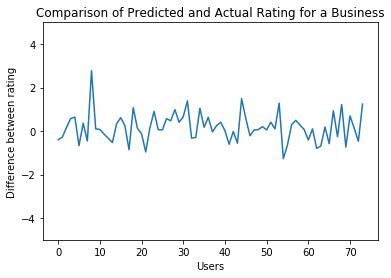

In [51]:
import matplotlib.pyplot as plt
plt.plot(np.array(review_test_result_df[review_test_result_df["business_id"] == "RAh9WCQAuocM7hYM5_6tnw"].stars) - np.array(review_test_folds[2][review_test_folds[2]["business_id"] == "RAh9WCQAuocM7hYM5_6tnw"].stars))
plt.ylabel('Difference between rating')
plt.xlabel('Users')
plt.ylim([-5, 5])
plt.title("Comparison of Predicted and Actual Rating for a Business")
plt.show()

In [307]:
review_test_result_df.groupby(['user_id'])["stars"] \
                             .count() \
                             .reset_index(name='count') \
                             .sort_values(['count'], ascending=False) \
                             .head(5)

,user_id,count
26,62GNFh5FySkA3MbrQmnqvg,201
24,5CgjjDAic2-FAvCtiHpytA,112
64,HzEtbh5KYzfeW_MTVnGCEA,107
99,SlgpAnj2gQd44EM_Uq6DkQ,95
55,E43QxgV87Ij6KxMCHcijKw,89


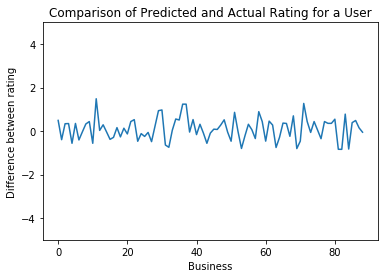

In [54]:
plt.plot(np.array(review_test_result_df[review_test_result_df["user_id"] == "E43QxgV87Ij6KxMCHcijKw"].stars) - (np.array(review_test_folds[2][review_test_folds[2]["user_id"] == "E43QxgV87Ij6KxMCHcijKw"].stars)))
plt.ylabel('Difference between rating')
plt.xlabel('Business')
plt.ylim([-5, 5])
plt.title("Comparison of Predicted and Actual Rating for a User")
plt.show()

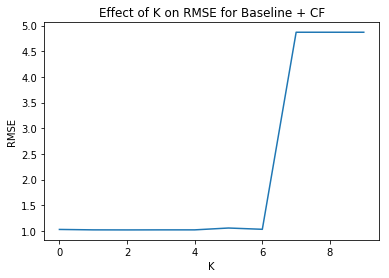

In [3]:
import matplotlib.pyplot as plt
plt.plot([1.0272, 1.019, 1.018, 1.019, 1.019, 1.055, 1.03, 4.8705, 4.8705, 4.8705])
plt.ylabel('RMSE')
plt.xlabel('K')
plt.title("Effect of K on RMSE for Baseline + CF")
plt.show()